In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define Constants

In [60]:
MARKET_MEAN_PRICE = 100
UPPER_CHANGE = 0.25
LOWER_CHANGE = -0.25
"""
-> (a - b) / b = change
-> a - b = b * change
-> a = b * (change + 1)
"""
UPPER_BOUND = MARKET_MEAN_PRICE * (UPPER_CHANGE + 1)
LOWER_BOUND = MARKET_MEAN_PRICE * (LOWER_CHANGE + 1)
POSSIBLE_ACTIONS = (0., 0.25, 0.5, 0.75, 1.)

# Define Rewards

In [61]:
def mean_price_relative_reward(
    action: np.ndarray,
    market_mean_price: float,
    next_price: float,
    reward_scaling: float
) -> float:
    price_advantage = (1 - next_price / market_mean_price)
    reward = reward_scaling * action * price_advantage

    return reward


def action_magnitude_reward(action: float, reward_scaling: float) -> float:
    reward = action ** 2
    reward = -reward * reward_scaling

    return reward

# Visualize Mean Price Relative Rewards

In [62]:
def get_mean_price_relative_rewards(action: float, reward_scaling: float):
    assert 0. <= action <= 1.
    
    prices_range = np.arange(LOWER_BOUND, UPPER_BOUND + 1)
    mean_price_relative_rewards = []
    for price in prices_range:
        mean_price_relative_rewards.append(
            mean_price_relative_reward(
                action=action,
                market_mean_price=MARKET_MEAN_PRICE,
                next_price=price,
                reward_scaling=reward_scaling
            )
        )
        
    return prices_range, mean_price_relative_rewards


def plot_mean_price_relative_rewards_for(reward_scaling: float):
    for action in POSSIBLE_ACTIONS:
        prices_range, mean_price_relative_rewards = get_mean_price_relative_rewards(action, reward_scaling)
        prices_range = prices_range / MARKET_MEAN_PRICE
        plt.plot(prices_range, mean_price_relative_rewards, label=str(action))
    plt.legend()

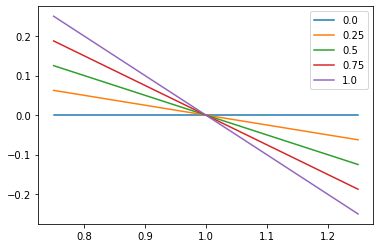

In [63]:
plot_mean_price_relative_rewards_for(reward_scaling=1)

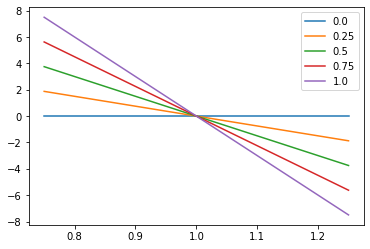

In [126]:
plot_mean_price_relative_rewards_for(reward_scaling=30)

# Visualize Action Magnitude Rewards

In [65]:
def plot_action_magnitude_rewards_for(reward_scaling: float):
    labels = []
    rewards = []
    for action in POSSIBLE_ACTIONS:
        labels.append(str(action))
        rewards.append(
            action_magnitude_reward(action, reward_scaling)
        )
    
    plt.bar(labels, rewards)

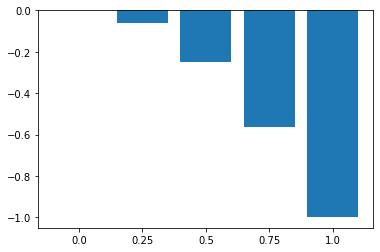

In [66]:
plot_action_magnitude_rewards_for(reward_scaling=1.)

# Visualize Together

In [103]:
def plot_aggregated(reward_scaling_price: float, reward_scaling_action: float):
    for action in POSSIBLE_ACTIONS:
        prices_range, mean_price_relative_rewards = get_mean_price_relative_rewards(action, reward_scaling_price)
        action_reward = action_magnitude_reward(action, reward_scaling_action)
        rewards = np.array(mean_price_relative_rewards) + action_reward
        
        plt.plot(prices_range / MARKET_MEAN_PRICE, rewards, label=str(action))
        
    plt.legend()

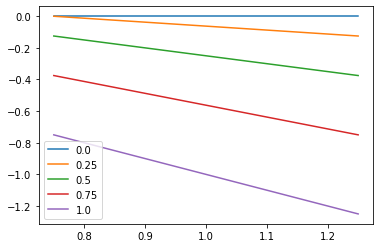

In [91]:
# We can see that if the rewards are not scaled the agent will never get positive rewards.
plot_aggregated(reward_scaling_price=1., reward_scaling_action=1.)

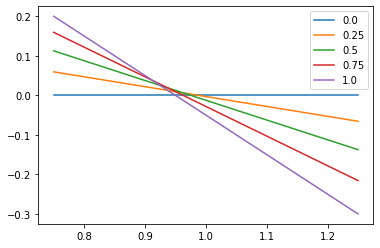

In [137]:
# Also it is not enough to scale only the reward_scaling_action because of the following reasons:
# - if you scale it too much down it because redundant
# - the rewards in this setup are too small to propagate any useful information
# - it is very hard for the agent to get any positive reinforcement
plot_aggregated(reward_scaling_price=1., reward_scaling_action=0.05)

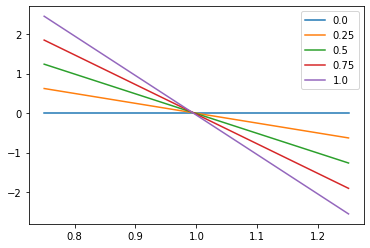

In [140]:
# We can see that if we start to scale the price reward the values start to grow & 
# the graph start to be more symmetrical. Which gives the agent the change to have +- reinforcements.
plot_aggregated(reward_scaling_price=10., reward_scaling_action=0.05)

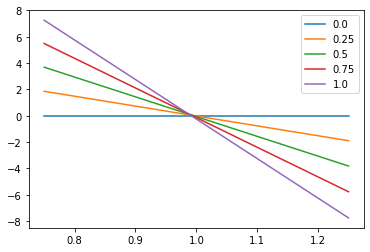

In [111]:
# This seems to be a symmetric reward between positive & negative ones.
plot_aggregated(reward_scaling_price=30., reward_scaling_action=0.25)
# Even the magnitude of the rewards seem ok. Usually there is no more than +-10% volatility within a month.

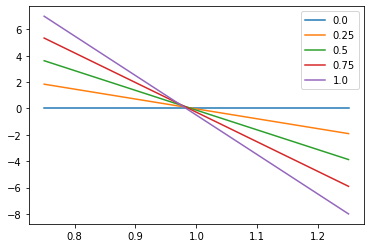

In [133]:
# Let's look for a setup where the agent is reinforcent slightly negative
# if it takes a big action at the wrong time.
plot_aggregated(reward_scaling_price=30, reward_scaling_action=0.5)

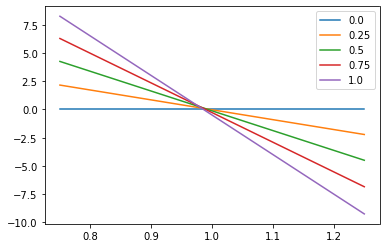

In [143]:
plot_aggregated(reward_scaling_price=35, reward_scaling_action=0.5)